### Importación de datos



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



In [8]:
Ingreso_Total_Tienda = tienda['Precio'].sum()
print(Ingreso_Total_Tienda)
Ingreso_Total_Tienda2 = tienda2['Precio'].sum()
print(Ingreso_Total_Tienda2)
Ingreso_Total_Tienda3 = tienda3['Precio'].sum()
print(Ingreso_Total_Tienda3)
Ingreso_Total_Tienda4 = tienda4['Precio'].sum()
print(Ingreso_Total_Tienda4)

1150880400.0
1116343500.0
1098019600.0
1038375700.0


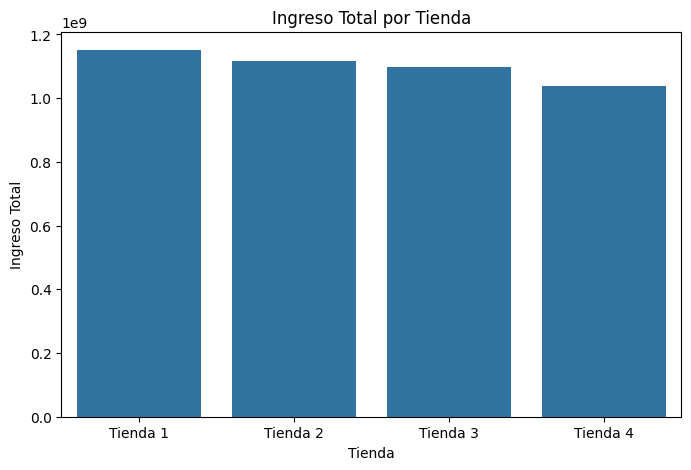

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

ingresos_totales = {
    "Tienda 1": tienda['Precio'].sum(),
    "Tienda 2": tienda2['Precio'].sum(),
    "Tienda 3": tienda3['Precio'].sum(),
    "Tienda 4": tienda4['Precio'].sum()
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(ingresos_totales.keys()), y=list(ingresos_totales.values()))
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.show()



# 2. Ventas por categoría

In [23]:
def ventas_por_categoria(df, nombre_tienda):
  ventas = df.groupby('Categoría del Producto').size().sort_values(ascending=False)
  print(f"Ventas por categoría en {nombre_tienda}:")
  print(ventas)

ventas_por_categoria(tienda, "Tienda 1")
ventas_por_categoria(tienda2, "Tienda 2")
ventas_por_categoria(tienda3, "Tienda 3")
ventas_por_categoria(tienda4, "Tienda 4")



Ventas por categoría en Tienda 1:


,0
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


Ventas por categoría en Tienda 2:


,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


Ventas por categoría en Tienda 3:


,0
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


Ventas por categoría en Tienda 4:


,0
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


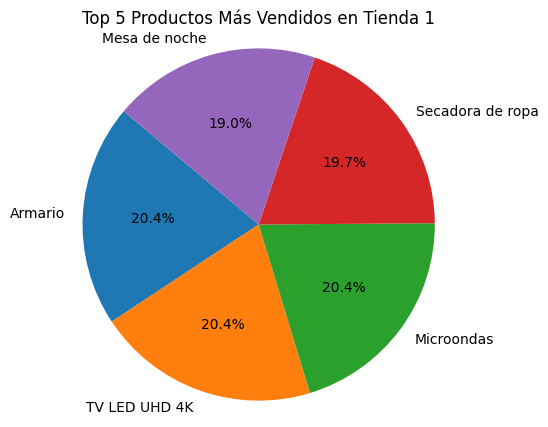

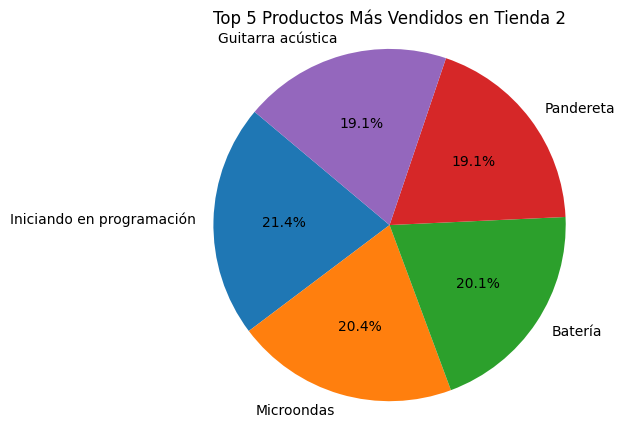

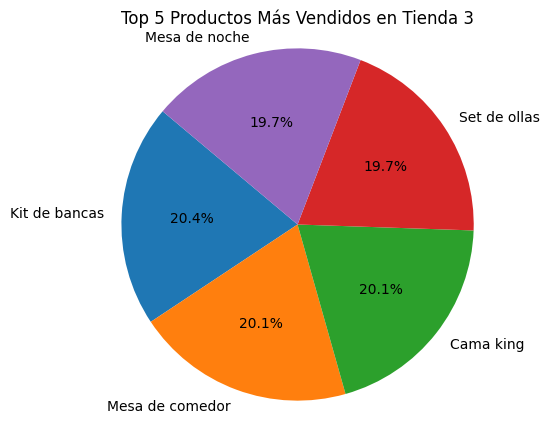

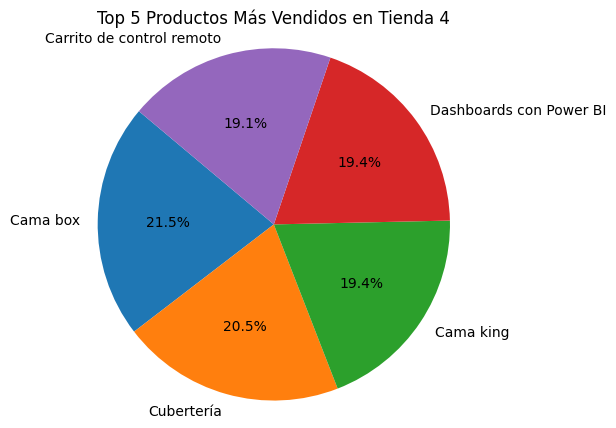

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

ingresos_totales = {
    "Tienda 1": tienda['Precio'].sum(),
    "Tienda 2": tienda2['Precio'].sum(),
    "Tienda 3": tienda3['Precio'].sum(),
    "Tienda 4": tienda4['Precio'].sum()
}

def ventas_por_producto_pie(df, nombre_tienda):
  ventas_producto = df.groupby('Producto').size().sort_values(ascending=False)
  top_5_ventas = ventas_producto.head(5)
  plt.figure(figsize=(5, 5))
  plt.pie(top_5_ventas, labels=top_5_ventas.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Top 5 Productos Más Vendidos en {nombre_tienda}')
  plt.axis('equal')
  plt.show()

ventas_por_producto_pie(tienda, "Tienda 1")
ventas_por_producto_pie(tienda2, "Tienda 2")
ventas_por_producto_pie(tienda3, "Tienda 3")
ventas_por_producto_pie(tienda4, "Tienda 4")

# 3. Calificación promedio de la tienda


In [14]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
print(f"Calificación promedio en Tienda 1: {calificacion_promedio_tienda1:.2f}")

calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
print(f"Calificación promedio en Tienda 2: {calificacion_promedio_tienda2:.2f}")

calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
print(f"Calificación promedio en Tienda 3: {calificacion_promedio_tienda3:.2f}")

calificacion_promedio_tienda4 = tienda4['Calificación'].mean()
print(f"Calificación promedio en Tienda 4: {calificacion_promedio_tienda4:.2f}")

Calificación promedio en Tienda 1: 3.98
Calificación promedio en Tienda 2: 4.04
Calificación promedio en Tienda 3: 4.05
Calificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [17]:
def productos_mas_menos_vendidos(df, nombre_tienda):
  ventas_producto = df.groupby('Producto').size().sort_values(ascending=False)

  print(f"\nProductos más vendidos en {nombre_tienda}:")
  print(ventas_producto.head())

  print(f"\nProductos menos vendidos en {nombre_tienda}:")
  print(ventas_producto.tail())


productos_mas_menos_vendidos(tienda, "Tienda 1")
productos_mas_menos_vendidos(tienda2, "Tienda 2")
productos_mas_menos_vendidos(tienda3, "Tienda 3")
productos_mas_menos_vendidos(tienda4, "Tienda 4")


Productos más vendidos en Tienda 1:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
dtype: int64

Productos menos vendidos en Tienda 1:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
dtype: int64

Productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
dtype: int64

Productos menos vendidos en Tienda 2:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
dtype: int64

Productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
dtype: int64

Productos menos vendidos en Tienda 3:
Product

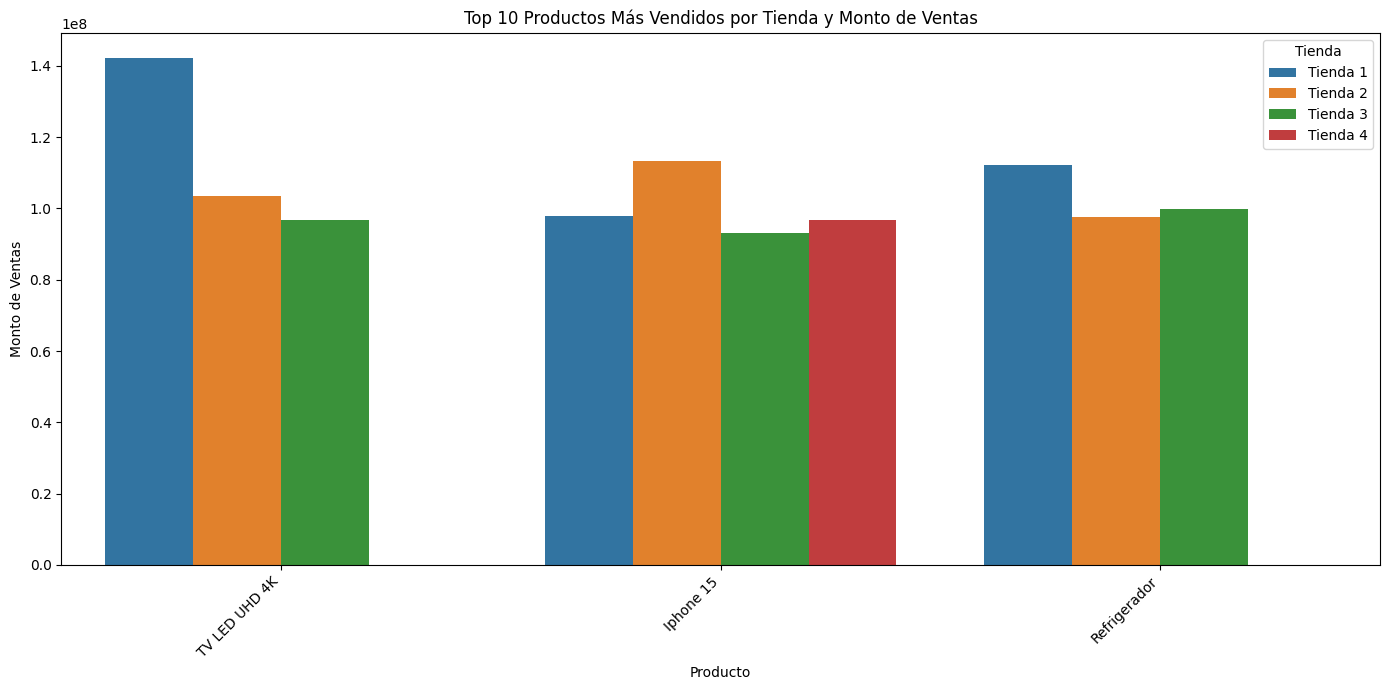

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_stores_df = pd.concat([tienda.assign(Tienda='Tienda 1'),
                           tienda2.assign(Tienda='Tienda 2'),
                           tienda3.assign(Tienda='Tienda 3'),
                           tienda4.assign(Tienda='Tienda 4')])

product_sales = all_stores_df.groupby(['Producto', 'Tienda'])['Precio'].sum().reset_index()

top_products = product_sales.sort_values(by='Precio', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='Producto', y='Precio', hue='Tienda', data=top_products, dodge=True)
plt.title('Top 10 Productos Más Vendidos por Tienda y Monto de Ventas')
plt.xlabel('Producto')
plt.ylabel('Monto de Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [19]:
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
print(f"Costo de envío promedio en Tienda 1: {costo_envio_promedio_tienda1:.2f}")

costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
print(f"Costo de envío promedio en Tienda 2: {costo_envio_promedio_tienda2:.2f}")

costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
print(f"Costo de envío promedio en Tienda 3: {costo_envio_promedio_tienda3:.2f}")

costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()
print(f"Costo de envío promedio en Tienda 4: {costo_envio_promedio_tienda4:.2f}")

Costo de envío promedio en Tienda 1: 26018.61
Costo de envío promedio en Tienda 2: 25216.24
Costo de envío promedio en Tienda 3: 24805.68
Costo de envío promedio en Tienda 4: 23459.46


Ingreso neto total en Tienda 1: 2714865485700.0
Ingreso neto total en Tienda 2: 2633394831400.0
Ingreso neto total en Tienda 3: 2590169719800.0
Ingreso neto total en Tienda 4: 2448434583200.0


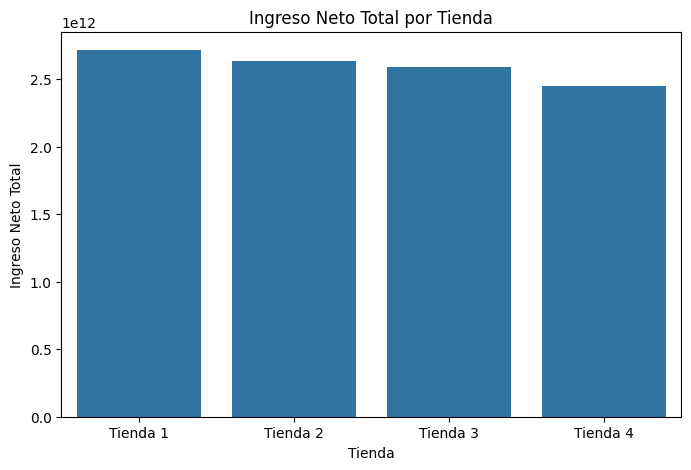

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ingreso_neto_tienda1 = (tienda['Precio'].sum() - tienda['Costo de envío']).sum()
print(f"Ingreso neto total en Tienda 1: {ingreso_neto_tienda1}")

ingreso_neto_tienda2 = (tienda2['Precio'].sum() - tienda2['Costo de envío']).sum()
print(f"Ingreso neto total en Tienda 2: {ingreso_neto_tienda2}")

ingreso_neto_tienda3 = (tienda3['Precio'].sum() - tienda3['Costo de envío']).sum()
print(f"Ingreso neto total en Tienda 3: {ingreso_neto_tienda3}")

ingreso_neto_tienda4 = (tienda4['Precio'].sum() - tienda4['Costo de envío']).sum()
print(f"Ingreso neto total en Tienda 4: {ingreso_neto_tienda4}")


ingresos_netos = {
    "Tienda 1": ingreso_neto_tienda1,
    "Tienda 2": ingreso_neto_tienda2,
    "Tienda 3": ingreso_neto_tienda3,
    "Tienda 4": ingreso_neto_tienda4
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(ingresos_netos.keys()), y=list(ingresos_netos.values()))
plt.title('Ingreso Neto Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Neto Total')
plt.show()

## Informe Final: Recomendación de Tienda para el Sr. Juan

### Introducción
El análisis de datos permite tomar desiciones con información de valor, en el presente informe se realiza el análisis de datos de venta de 4 tiendas cuyo análisis permitira a el Sr. Juan tomar una decisión sobre la venta de una de las tiendas.

### Análisis de Datos y Hallazgos

Los análisis realizados revelaron lo siguiente:

*   **Ingresos Totales:**

El analizar los ingresos totales de cada tienda se obtienen los siguientes datos:

**Tienda 1:** 1150880400.0

**Tienda 2:** 1116343500.0

**Tienda 3:** 1098019600.0

**Tienda 4:** 1038375700.0

Los datos revelan que la Tienda 4 es la que presenta un menor total de ventas.

*   **Ventas por Categoría:**
La Tienda 4 presenta un mayor número de ventas en las siguientes categorias: Muebles	480, Electrónicos	451, Juguetes	338, Deportes y diversión	277, Electrodomésticos	254, Artículos para el hogar	201, Libros	187, Instrumentos musicales	170

*   **Calificación Promedio de los Clientes:**
La Tienda 3 cuenta con una mejor calificación por parte de los usuarios con un promedio de 4.05

Calificación promedio en Tienda 1: 3.98

Calificación promedio en Tienda 2: 4.04

Calificación promedio en Tienda 3: 4.05

Calificación promedio en Tienda 4: 4.00

Existe una diferencia absoluta de 0.07 entre la Tienda 1 y la Tienda 3, no es una diferencia porcentual significativa para tomar relevancia en la decisión.

*   **Productos Más y Menos Vendidos:**
Dentro de los productos mas vendidoa la Tienda 4 solo presento un producto el Iphone 15 con un volumen de ventas de aproximadamente 100 millones, representando un aporte minoritario respecto al volumen de ventas de otros productos o de este mismo producto en otras tiendas.

*   **Costo de Envío Promedio:**
Aunque la Tienda 4 presenta un menor costo promdedio de envio

Costo de envío promedio en Tienda 1: 26018.61

Costo de envío promedio en Tienda 2: 25216.24

Costo de envío promedio en Tienda 3: 24805.68

Costo de envío promedio en Tienda 4: 23459.46

Al comparar con los ingresos netos esta Tienda presenta un menor valor

Ingreso neto total en Tienda 1: 2714865485700.0

Ingreso neto total en Tienda 2: 2633394831400.0

Ingreso neto total en Tienda 3: 2590169719800.0

Ingreso neto total en Tienda 4: 2448434583200.0


### Conclusión y Recomendación
El Análisis de los datos muestra que el Sr. Juan debe vender la Teinda 4.


**Justificación:**

*   **Mayores Ingresos Totales:** Se presentn en la Tienda 1
*   **Productos Estrella:** El producto estrella es el TV LED UHD 4K, este producto no tiene ventas significativas en la Tienda 4.
*   **Categorías Populares:** Del top 10 de productos vendidos la tienda 4 solo presenta 1, con ventas inferiores a las otras tiendas.

